# Image_Proccess_Filter

### Load scripts

In [1]:
import time
t0 = time.time()

In [2]:
%%time
from script.util import *

run_name = get_run_name('SC_Iceberg_Classifier', 'Image_Proccess_Filter')
sample_submission = load_sample_submission()
id_data, id_test = load_id()
y_data = load_y_data()
band1_data, band2_data, band1_test, band2_test = load_band_data()
x_data, x_test = load_data()

cwd: /data1/Kaggle/statoil-iceberg-classifier-challenge
input_path: /data1/Kaggle/statoil-iceberg-classifier-challenge/input
log_path: /data1/Kaggle/statoil-iceberg-classifier-challenge/log
model_path: /data1/Kaggle/statoil-iceberg-classifier-challenge/model
output_path: /data1/Kaggle/statoil-iceberg-classifier-challenge/output
run_name: SC_Iceberg_Classifier-Image_Proccess_Filter-20180111_154956
(8424, 2)
(1604,) 000d71b1 fffe76e4 12928
(8424,) 000c65d7 fff77564 67488
(1604,) 0 1 25688
(1604, 75, 75) 0.0 1.0 128
(1604, 75, 75) 0.0 1.0 128
(8424, 75, 75) 0.0 1.0 128
(8424, 75, 75) 0.0 1.0 128
(1604, 75, 75) 0.021036913869304875 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(1604, 75, 75, 3) 0.0 1.0 216540144
(8424, 75, 75, 3) 0.0 1.0 1137240144
CPU times: user 2.34 s, sys: 2.57 s, total: 4.91 s
Wall time: 4.9 s


### Filter: Edge

In [3]:
%%time
from skimage import data, filters

band1_data_sobel = np.array([filters.sobel(x) for x in band1_data])
band2_data_sobel = np.array([filters.sobel(x) for x in band2_data])
band1_test_sobel = np.array([filters.sobel(x) for x in band1_test])
band2_test_sobel = np.array([filters.sobel(x) for x in band2_test])

band1_data_sobel_path = os.path.join(input_path, 'band1_data_sobel.p')
band2_data_sobel_path = os.path.join(input_path, 'band2_data_sobel.p')
band1_test_sobel_path = os.path.join(input_path, 'band1_test_sobel.p')
band2_test_sobel_path = os.path.join(input_path, 'band2_test_sobel.p')

pickle.dump(band1_data_sobel, open(band1_data_sobel_path, 'wb'))
pickle.dump(band2_data_sobel, open(band2_data_sobel_path, 'wb'))
pickle.dump(band1_test_sobel, open(band1_test_sobel_path, 'wb'))
pickle.dump(band2_test_sobel, open(band2_test_sobel_path, 'wb'))

describe(band1_data_sobel)
describe(band2_data_sobel)
describe(band1_test_sobel)
describe(band2_test_sobel)

(1604, 75, 75) 0.0 0.5684123748246684 72180128
(1604, 75, 75) 0.0 0.6099264357815246 72180128
(8424, 75, 75) 0.0 0.6076572137225327 379080128
(8424, 75, 75) 0.0 0.6065352455396166 379080128
CPU times: user 7.88 s, sys: 2.1 s, total: 9.98 s
Wall time: 9.7 s


(6, 4)
(6, 4)


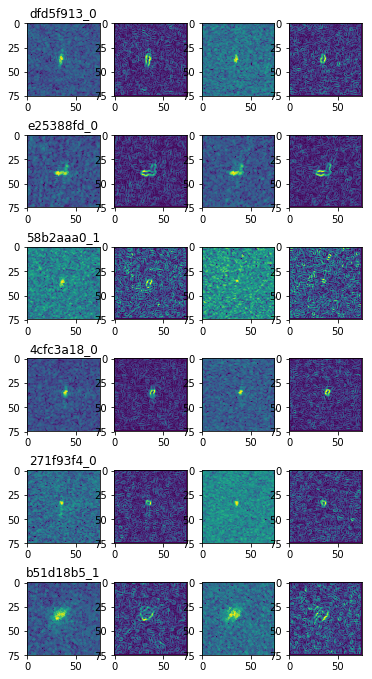

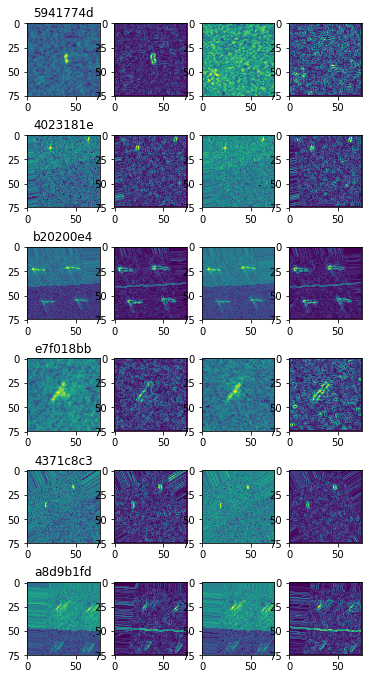

In [4]:
show_data_images(6, 3, id_data, y_data, band1_data, band1_data_sobel, band2_data, band2_data_sobel)
show_data_images(6, 3, id_test, None, band1_test, band1_test_sobel, band2_test, band2_test_sobel)

### Filter: Gabor

gabor滤波可用来进行边缘检测和纹理特征提取

In [5]:
%%time
from skimage import data, filters

band1_data_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x in band1_data])
band2_data_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x band2_data])
band1_test_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x band1_test])
band2_test_gabor = np.array([filters.gabor(x, frequency=0.1)[0] for x band2_test])

band1_data_gabor_path = os.path.join(input_path, 'band1_data_gabor.p')
band2_data_gabor_path = os.path.join(input_path, 'band2_data_gabor.p')
band1_test_gabor_path = os.path.join(input_path, 'band1_test_gabor.p')
band2_test_gabor_path = os.path.join(input_path, 'band2_test_gabor.p')

pickle.dump(band1_data_gabor, open(band1_data_gabor_path, 'wb'))
pickle.dump(band2_data_gabor, open(band2_data_gabor_path, 'wb'))
pickle.dump(band1_test_gabor, open(band1_test_gabor_path, 'wb'))
pickle.dump(band2_test_gabor, open(band2_test_gabor_path, 'wb'))

describe(band1_data_gabor)
describe(band2_data_gabor)
describe(band1_test_gabor)
describe(band2_test_gabor)

SyntaxError: invalid syntax (<unknown>, line 4)

In [ ]:
show_data_images(6, 3, id_data, y_data, band1_data, band1_data_gabor, band2_data, band2_data_gabor)
show_data_images(6, 3, id_test, None, band1_test, band1_test_gabor, band2_test, band2_test_gabor)

In [ ]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

In [ ]:
print(run_name)